In [5]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


ModuleNotFoundError: No module named 'xgboost'

In [6]:
default = pd.read_csv('credit_card_data.csv')
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
default.drop(columns=['ID'], inplace =True)
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
default.rename(columns = lambda x : x.lower(), inplace=True)

In [9]:
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

In [10]:
default['male'] = (default['sex'] == 1).astype('int')
default.drop('sex', axis=1, inplace=True)

In [11]:
default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

In [12]:
pay_features = ['pay_0', 'pay_2','pay_3','pay_4','pay_5','pay_6', ]
for p in pay_features:
    default.loc[default[p]<= 0, p] = 0
    
default.rename(columns={'default.payment.next.month':'default'}, inplace =True)

In [25]:
cols = list(default.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove x from list
default = default[cols+['default']] 

In [35]:
default.columns.values

array(['limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'grad_school', 'university',
       'high_school', 'male', 'married', 'default'], dtype=object)

In [37]:
X = default.drop('default', axis =1)
Y = default['default']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=25, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

In [43]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
model.fit(x_train, y_train, epochs = 100, batch_size=20, validation_data=(x_test, y_test))

Train on 5308 samples, validate on 1328 samples
Epoch 1/100
5308/5308 [==============================] - 1s 259us/step - loss: 0.0052 - acc: 0.9998 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/100
5308/5308 [==============================] - 1s 130us/step - loss: 0.0074 - acc: 0.9996 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/100
5308/5308 [==============================] - 1s 133us/step - loss: 0.0104 - acc: 0.9994 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/100
5308/5308 [==============================] - 1s 143us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/100
5308/5308 [==============================] - 1s 129us/step - loss: 0.0040 - acc: 0.9998 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/100
5308/5308 [==============================] - 1s 131us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/100
5308/5308 [==============================] - 1s 138us/step - loss: 0.0040 - acc: 0.9998 - val_

5308/5308 [==============================] - 1s 141us/step - loss: 3.4491e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 58/100
5308/5308 [==============================] - 1s 153us/step - loss: 2.6595e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 59/100
5308/5308 [==============================] - 1s 119us/step - loss: 3.2211e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 60/100
5308/5308 [==============================] - 1s 121us/step - loss: 2.9228e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 61/100
5308/5308 [==============================] - 1s 133us/step - loss: 2.0410e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 62/100
5308/5308 [==============================] - 1s 143us/step - loss: 2.6681e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 63/100
5308/5308 [==============================] - 1s 148us/step - loss: 2.7593e-05 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc

In [15]:
not_default = default[default['default'] == 0]
default = default[default['default'] == 1]

In [16]:
df_use = not_default.append(default).sample(frac=1).reset_index(drop=True)

X = df_use.drop(['default'], axis = 1).values

Y = df_use["default"].values

In [17]:
input_layer = Input(shape=(X.shape[1],))

W0802 22:47:03.963165 140734969107904 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 22:47:04.070940 140734969107904 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [18]:
## encoding part

encoded = Dense(106, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part

decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(106, activation='tanh')(decoded)

 

W0802 22:47:41.920576 140734969107904 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [19]:
## output layer

output_layer = Dense(X.shape[1], activation='relu')(decoded)


autoencoder = Model(input_layer, output_layer)

autoencoder.compile(optimizer="adam", loss="mse")
 

W0802 22:48:10.451117 140734969107904 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
x = default.drop(["default"], axis=1)

y = default["default"].values

In [22]:
x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)

x_norm, x_default = x_scale[y == 0], x_scale[y == 1]

 
autoencoder.fit(x_norm[0:1000000], x_norm[0:1000000],

                batch_size = 256, epochs = 10,

                shuffle = True, validation_split = 0.20);

Train on 0 samples, validate on 0 samples
Epoch 1/10


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

In [12]:
X = default.drop('default', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data = CM, index=labels, columns =labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total']=df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [14]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                      columns=['NULL', 'LogisticReg','ClassTree','NaiveBayes'])

In [15]:
from xgboost import XGBClassifier

In [16]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred_xgb)

array([[4437,  236],
       [ 849,  478]], dtype=int64)

In [18]:
accuracy_score(y_test,y_pred_xgb)*100

81.91666666666667

In [19]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [20]:
precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_true=y_test, probas_pred = xgb_classifier.predict_proba(X_test)[:,1])

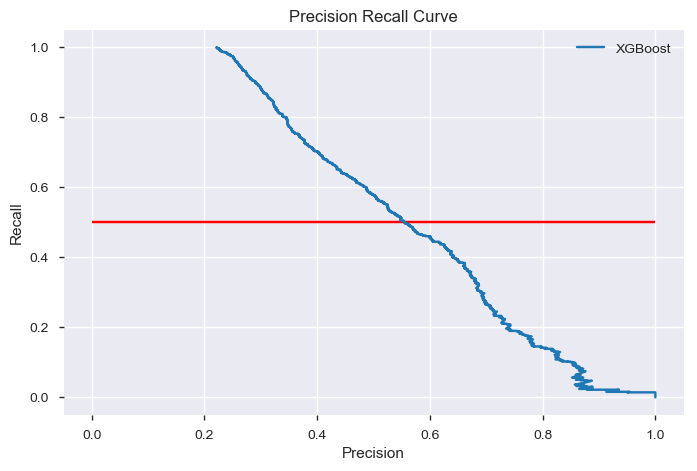

In [52]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(precision_xg,recall_xg, label='XGBoost')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid(b=True, which='minor', color='b', linestyle='-')

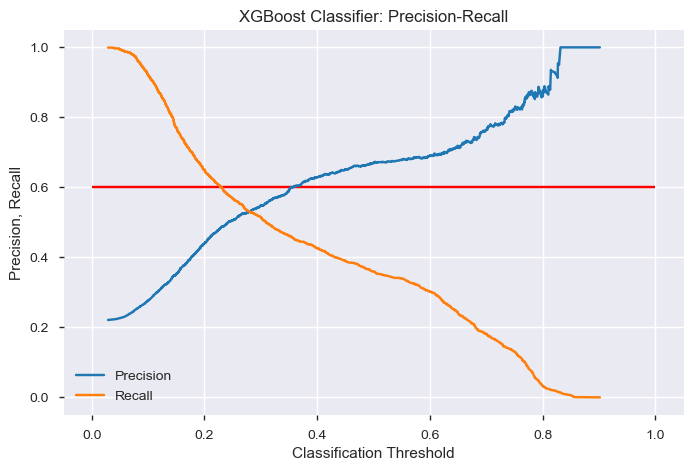

In [54]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(thresholds_xg,precision_xg[1:], label='Precision')
ax.plot(thresholds_xg,recall_xg[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('XGBoost Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid(b=True, which='minor', color='b', linestyle='-')


In [47]:
y_pred_proba = xgb_classifier.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')
#confusion Matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true=y_test)
print('Recall: ', 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print('Precision: ', 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  65.10926902788245
Precision:  44.014263881813555


PREDICTION,pay,default,Total
TRUE,,,
pay,3574,1099,4673
default,463,864,1327
Total,4037,1963,6000


## Making individual Predictions

In [45]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1,-1)
    data = robust_scaler.transform(data)
    prob = xgb_classifier.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default ' + str(prob)
    else:
        'Will pay'

In [46]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal',4000),('age',50),('bill_amt1',500),
                           ('bill_amt2',35509),('bill_amt3',689),('bill_amt4',0),
                           ('bill_amt5',0),('bill_amt6',0),('pay_amt1',0),('pay_amt2',35509),
                            ('pay_amt3',0),('pay_amt4',0),('pay_amt5',0),('pay_amt6',0),
                            ('male',1),('grad_school',0),('university',1),('high_school',0),
                            ('married',1),('pay_0',-1),('pay_2',-1),('pay_3',-1),
                            ('pay_4',0),('pay_5',-1),('pay_6',0)
                           ])

new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'Will default 0.6145243'